# Mall Customer Segmentation Data

- My first clustering project

- Data from : https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

- The is data is createdly only for the learning purpose of the customer segmentation concept.

### Content:
- You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
- Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

### Problem Statement:
- You want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.


In [1]:
# Import the tools we need for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import seaborn as sns

In [2]:
# Read the data
customer_df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# Basic info.

In [3]:
# Check the shape
customer_df.shape
# total 200 records 

(200, 5)

In [4]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
customer_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

#### Drop the customer ID

In [7]:
print('The customer ID column is unique: ',len(customer_df.CustomerID.unique()) == customer_df.shape[0])

The customer ID column is unique:  True


In [8]:
customer_df.drop('CustomerID', axis=1, inplace=True)

#### Check for any missing values

In [9]:
customer_df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data visulaization , EDA

In [10]:
customer_df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

Gender (Number of male / female)

(0.0, 120.0)

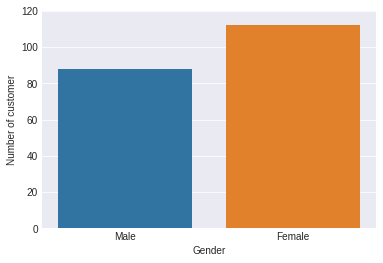

In [11]:
# Check for number of females and males in the data.
ax = sns.countplot('Gender',data=customer_df)
plt.ylabel('Number of customer')
plt.ylim(0,120)

Numeric columns distribution

In [12]:
num_cols = customer_df.select_dtypes(include='int64').columns

In [13]:
num_cols

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

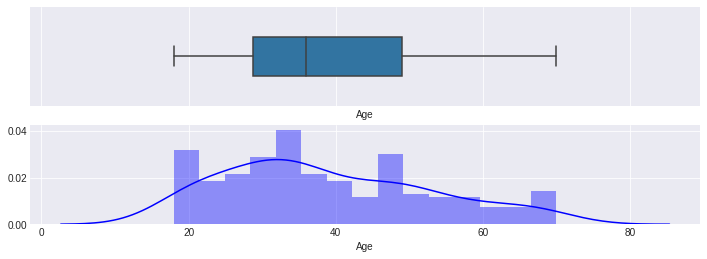

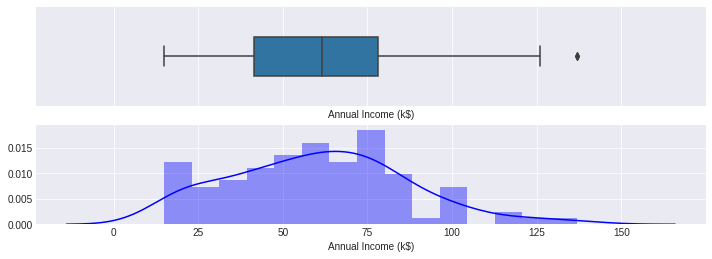

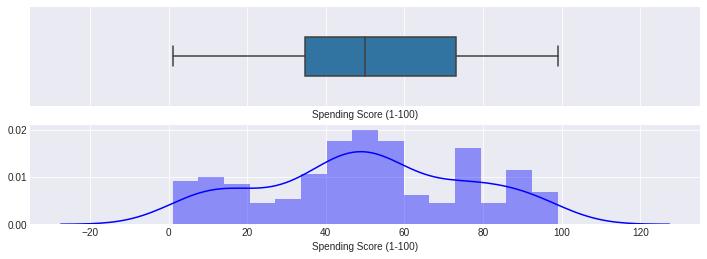

In [14]:
for cols in num_cols:
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,4))
    sns.boxplot(cols, data=customer_df, width=0.4, ax=ax1)
    sns.distplot(customer_df[cols],bins=15,color='blue')
plt.show()

Correlation

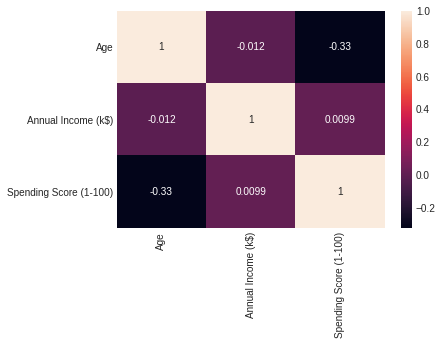

In [15]:
sns.heatmap(customer_df.corr(), annot=True)

#### Age VS Spending score / annual income 

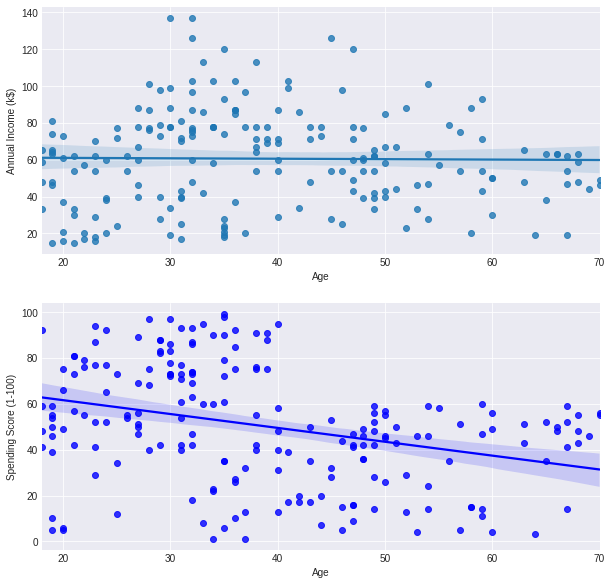

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.regplot('Age','Annual Income (k$)', data=customer_df)
plt.subplot(212)
sns.regplot('Age','Spending Score (1-100)',data=customer_df,color='blue')

- No obvious relation found between Age and income
- An negative relation observed in Age vs Spending score chart.

#### Gender Sex vs Age, spending score, income

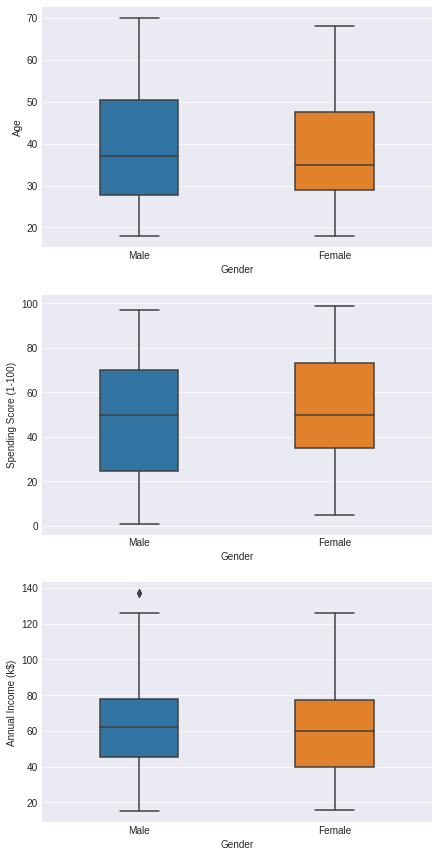

In [17]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, figsize=(7,15))
sns.boxplot(y='Age', x='Gender',data=customer_df, width=0.4,ax=ax1)
sns.boxplot(y='Spending Score (1-100)', x='Gender',data=customer_df, width=0.4,ax=ax2)
sns.boxplot(y='Annual Income (k$)', x='Gender',data=customer_df, width=0.4,ax=ax3)

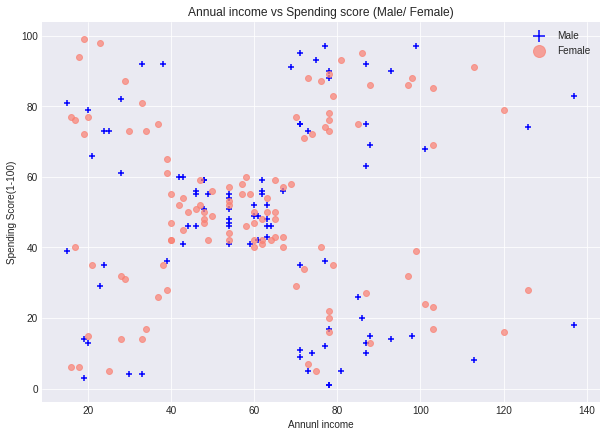

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(x=customer_df[customer_df.Gender=='Male']['Annual Income (k$)'],y=customer_df[customer_df.Gender=='Male']['Spending Score (1-100)'], alpha=1, color='blue', marker='+', label='Male')
plt.scatter(x=customer_df[customer_df.Gender=='Female']['Annual Income (k$)'],y=customer_df[customer_df.Gender=='Female']['Spending Score (1-100)'], alpha=0.7, color='salmon', label='Female')
plt.title('Annual income vs Spending score (Male/ Female)')
plt.xlabel('Annunl income')
plt.ylabel('Spending Score(1-100)')
plt.legend(markerscale=2)

# Data formatting

Gender : male to 1, female to 0

In [19]:
customer_df['Gender'] = customer_df['Gender'].map({'Male':1, 'Female':0})

# Start modeling using KMeans

In [20]:
# import kmeans 
from sklearn.cluster import KMeans

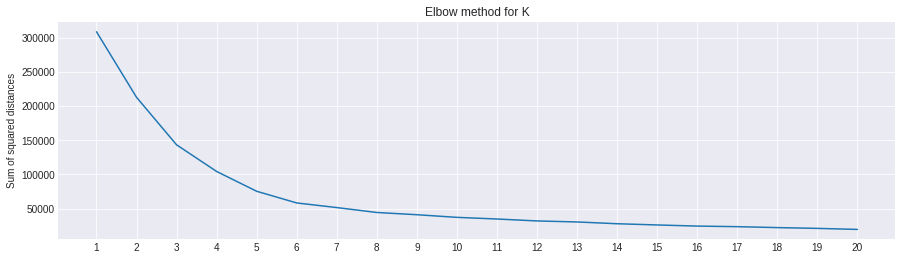

In [21]:
# Find the best number of clusters using elbow method
num_cls  = list(range(1,21))
error_list = []
for cls in num_cls:
    model = KMeans(n_clusters=cls)
    model.fit(customer_df)
    error_list.append(model.inertia_)#Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(15,4))
plt.title('Elbow method for K')
plt.plot(num_cls, error_list)
plt.xticks(list(range(1,21)))
plt.ylabel('Sum of squared distances')
plt.show()

- 5 or 6 would be fine.
- I will choose 6 to be the number of clusters.

Build the model

In [22]:
cls= 6
model = KMeans(init='k-means++',n_clusters = cls, n_init=12)
model.fit(customer_df)

KMeans(n_clusters=6, n_init=12)

In [23]:
# Place the labels to the dataset
comp_df = customer_df.copy()
comp_df['Seg'] = model.labels_

#### Lets explore the segmentation

Text(0.5, 0, 'Segment')

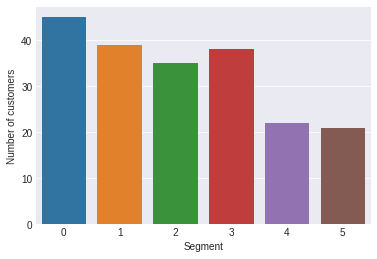

In [24]:
sns.countplot('Seg',data=comp_df)
plt.ylabel('Number of customers')
plt.xlabel('Segment')

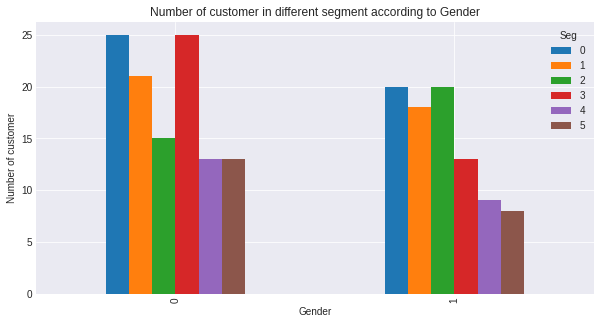

In [25]:
pd.crosstab(comp_df.Gender,comp_df.Seg).plot.bar(figsize=(10,5))
plt.ylabel('Number of customer')
plt.title('Number of customer in different segment according to Gender')
plt.show()

- There is more female in segment 0 than male , more male in segment 1 than female.

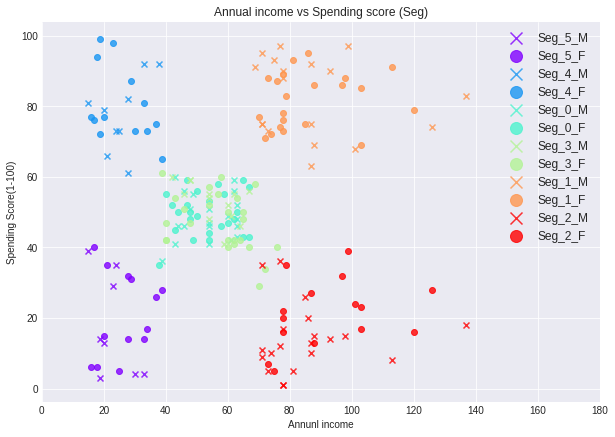

In [26]:
plt.figure(figsize=(10,7))
colors = plt.cm.rainbow(np.linspace(0,1,len(comp_df.Seg.unique())))
for label,cr in zip(comp_df.Seg.unique(),colors):
    plt.scatter(x=comp_df[(comp_df.Seg==label) & (comp_df.Gender ==1)]['Annual Income (k$)'],y=comp_df[(comp_df.Seg==label) & (comp_df.Gender ==1)]['Spending Score (1-100)'], alpha=0.8, color=cr, marker='x', label='Seg_{}_M'.format(label))
    plt.scatter(x=comp_df[(comp_df.Seg==label) & (comp_df.Gender ==0)]['Annual Income (k$)'],y=comp_df[(comp_df.Seg==label) & (comp_df.Gender ==0)]['Spending Score (1-100)'], alpha=0.8, color=cr, marker='o', label='Seg_{}_F'.format(label))
plt.title('Annual income vs Spending score (Seg)')
plt.xlim(0,180)
plt.xlabel('Annunl income')
plt.ylabel('Spending Score(1-100)')
plt.legend(markerscale=2,fontsize=12)

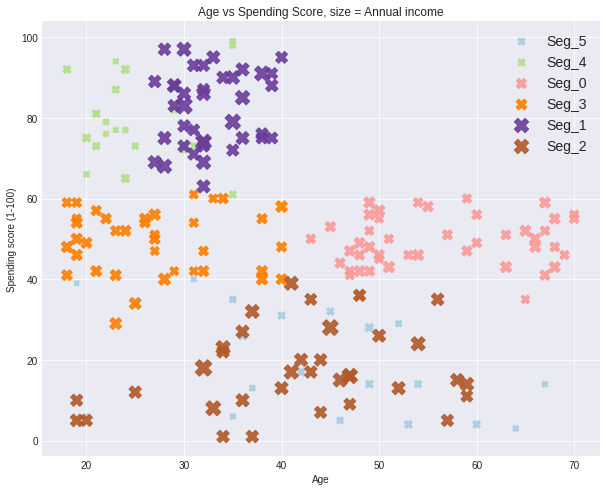

In [27]:
plt.figure(figsize=(10,8))
colors = plt.cm.Paired(np.linspace(0,1,len(comp_df.Seg.unique())))
for label,cr in zip(comp_df.Seg.unique(),colors):
    plt.scatter(x=comp_df[comp_df.Seg==label]['Age'],y=comp_df[comp_df.Seg==label]['Spending Score (1-100)'], s=(comp_df[comp_df.Seg==label]['Annual Income (k$)']*2), alpha=0.9, color=cr, marker='X', label='Seg_{}'.format(label))

plt.title('Age vs Spending Score, size = Annual income')
plt.xlabel('Age')
plt.ylabel('Spending score (1-100)')
plt.legend(markerscale=1,fontsize=14)

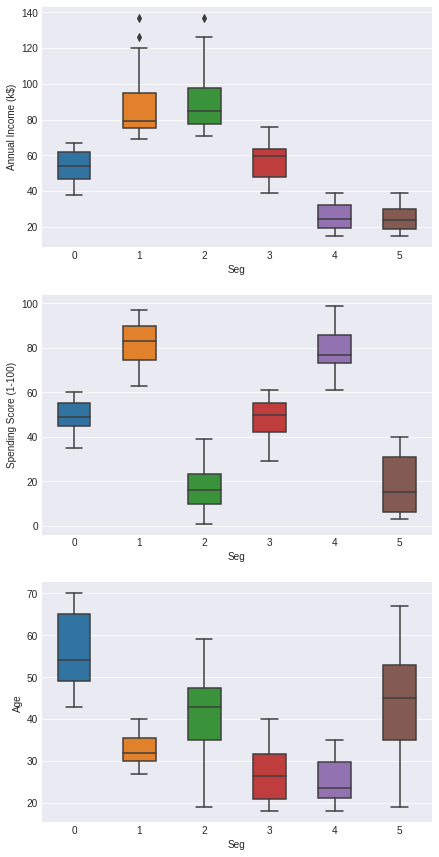

In [28]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, figsize=(7,15))
sns.boxplot(x='Seg',y='Annual Income (k$)', data=comp_df,ax=ax1, width=0.5)
sns.boxplot(x='Seg',y='Spending Score (1-100)', data=comp_df,ax=ax2 ,width=0.5)
sns.boxplot(x='Seg',y='Age', data=comp_df,ax=ax3, width=0.5)

# Result presentation

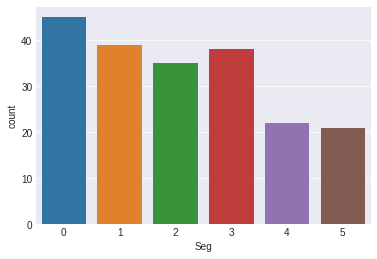

In [29]:
sns.countplot('Seg',data=comp_df)

In [30]:
comp_df.groupby('Seg').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Seg,,,,
0,0.444444,56.155556,53.377778,49.088889
1,0.461538,32.692308,86.538462,82.128205
2,0.571429,41.685714,88.228571,17.285714
3,0.342105,27.000000,56.657895,49.131579
4,0.409091,25.272727,25.727273,79.363636
5,0.380952,44.142857,25.142857,19.523810


### Characteristics of each segment:
- Segment 0: Mid age , elderly. Middle spending scores and annual income.
- Segment 1: Young adults (30~40). High spending scores and relatively high annual income.
- Segment 2: Teens, young adults. High spending scores but low annual income.
- Segment 3: People with high annual income but low spending scores. 
- Segment 4: Teens, young adults, middle spending scores and annual income.
- Segment 5: People with low annual income and low spending scores.

### Small Conclusion:

- The customer in segment 3 have relatively higher potential (high income , lower spending score).
- Number of male in segment 3 is more than female.

# Thank you